In [368]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
import os, time, math, datetime
from matplotlib.dates import DateFormatter
import matplotlib.pyplot as plt
import matplotlib.dates as mdate

In [143]:
data = pd.DataFrame()
for file in os.listdir("Data"):
    data = data.append(pd.read_csv("./Data/"+file, skiprows=3), ignore_index=True)

data["Timestamp"] = pd.to_datetime(data['Timestamp'])


In [144]:
data.sort_values("Timestamp",ignore_index=True, inplace=True)
data.to_csv("Electrical_All.csv")
data.set_index('Timestamp', inplace=True)

In [154]:
data = data.groupby(data.index.floor('d')).mean()

In [230]:
ordered_data = data[data.columns[[0,6,11,1,2,5,8,9,3,4,7,10,12]]]
ordered_data.to_csv("Electrical_All.csv")

[2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2013, 2014, 2015]

In [232]:
ordered_data.describe()

,Adam Joseph Lewis Center - Gross Electricity Consumption (kWh),Kohl Building - Total Electricity Use (kWh),Science Center - Electricity Use (kWh),Asia House - Residential Electricity Use (kWh),East - Electricity Use (kWh),Kahn - Total Electricity Use (kWh),Noah - Electricity Use (kWh),North - Electricity Use (kWh),Fairchild - Residential Electricity Use (kWh),Harvey - Electricity Use (kWh),Lord - Electricity Use (kWh),Saunders - Electricity Use (kWh),Talcott - Residential Electricity Use (kWh)
count,3514.000000,1048.000000,2005.000000,3477.000000,2876.000000,3364.000000,3453.000000,3193.000000,3634.000000,3328.000000,3333.000000,3426.000000,3409.000000
mean,2.779564,25.778824,90.196301,1.878194,10.840342,13.282377,2.586587,7.884440,0.824460,1.262747,1.960388,1.606759,1.201982
std,1.591383,4.934706,21.471098,0.597322,223.799713,8.155039,0.987624,1.884959,0.506627,0.420909,0.722587,0.678169,0.388778
min,0.065163,9.000000,65.788750,0.068750,0.000000,0.825000,0.802708,2.366927,0.048958,0.365547,0.191875,0.097500,0.142563
25%,1.580540,24.697917,82.583333,1.467930,3.835781,10.025846,1.831146,6.385521,0.393418,0.938137,1.365417,1.109271,0.965273
50%,2.191823,25.820312,86.750000,2.007161,5.413854,11.567578,2.333021,8.111146,0.712051,1.245681,2.021302,1.525207,1.211667
75%,3.801634,26.902344,93.177083,2.351797,7.113645,12.984831,3.150521,9.296875,1.188411,1.497321,2.440026,1.958916,1.447852
max,10.487393,161.733328,825.634052,8.596565,11893.462420,60.146137,12.352821,31.009875,5.724102,4.169715,9.383462,6.766279,4.388559


In [239]:
year_data.isna().sum()

Adam Joseph Lewis Center - Gross Electricity Consumption (kWh)      0
Kohl Building - Total Electricity Use (kWh)                       245
Science Center - Electricity Use (kWh)                            365
Asia House - Residential Electricity Use (kWh)                     12
East - Electricity Use (kWh)                                       90
Kahn - Total Electricity Use (kWh)                                  0
Noah - Electricity Use (kWh)                                       59
North - Electricity Use (kWh)                                      58
Fairchild - Residential Electricity Use (kWh)                       0
Harvey - Electricity Use (kWh)                                    120
Lord - Electricity Use (kWh)                                       60
Saunders - Electricity Use (kWh)                                    0
Talcott - Residential Electricity Use (kWh)                        18
dtype: int64

In [294]:
f"./Graphs/Year/{year}_Electrical.csv"

'./Graphs/Year/2018_Electrical.csv'

In [391]:
# get the building type and color code
def setCategories(col_num):
        if col_num < 3:
            return "Academic Building", "lightcoral"
        if col_num < 8:
            return "North Residential Hall", "mediumpurple"
        else:
            return "South Residential Hall", "cornflowerblue"

# Plot by year
def plot_by_year(year, data, fontsize = 15, margin = 10, labelrotation=10):
    year_data = data[data.index.year == year]

    col_num=0
    fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(30, 20))
    fig.suptitle(str(year) +" Electricity Usage", fontsize = fontsize + 10)

    
    
    categories = {}
    
    for row in ax:
        for col in row:
            set_label, set_color = setCategories(col_num)
            label = col.bar(year_data.index, year_data[year_data.columns[col_num]], label = set_label, color=set_color) 

            if set_label not in categories:
                categories[set_label] = label
            
            col.set_xlabel("Month", fontsize=fontsize)
            col.set_ylabel("kWh", fontsize=fontsize)
            col.set_xlim([datetime.date(year-1, 12, 31-margin), datetime.date(year+1, 1, margin)]) #CHANGE
            col.set_title(year_data.columns[col_num], fontsize=fontsize, color=setColor(col_num))
            col.xaxis.set_major_formatter(DateFormatter("%Y-%m"))
            col.tick_params(axis='x', labelsize=fontsize, labelrotation = labelrotation)
            col.tick_params(axis='y', labelsize=fontsize)
            col_num+=1
            
    plt.tight_layout(pad=6.5, w_pad=0.5, h_pad=2)
    
    plt.legend(handles=categories.values(), bbox_to_anchor=[-1.1, 3.9], fontsize=fontsize)
    plt.savefig(f"./Graphs/Year/{year}_Electrical.png")

    # Plot from 2013 to 2023
# for year in range(2013, 2023):
#     plot_by_year(year, ordered_data)

In [394]:
# Plot by dorm
def plot_by_dorm(data, col_num, fontsize = 15, margin = 10):
    set_label, set_color = setCategories(col_num)
    locator = mdate.YearLocator()
    
    plt.figure(figsize=(15, 10))
    plt.bar(data.index, data, label = set_label, color = set_color)
    plt.xlabel("Year", fontsize=fontsize)
    plt.ylabel("kWh", fontsize=fontsize)
    plt.title(data.name, fontsize=fontsize, color = set_color)
    plt.tick_params(axis='x', labelsize=fontsize)
    plt.tick_params(axis='y', labelsize=fontsize)

    plt.gca().xaxis.set_major_locator(locator)
    plt.gca().xaxis.set_major_formatter(DateFormatter('%Y'))

    plt.gcf().autofmt_xdate()            
    # plt.tight_layout()
    plt.legend()

    plt.savefig(f"./Graphs/Building/{data.name}_Electrical.png")

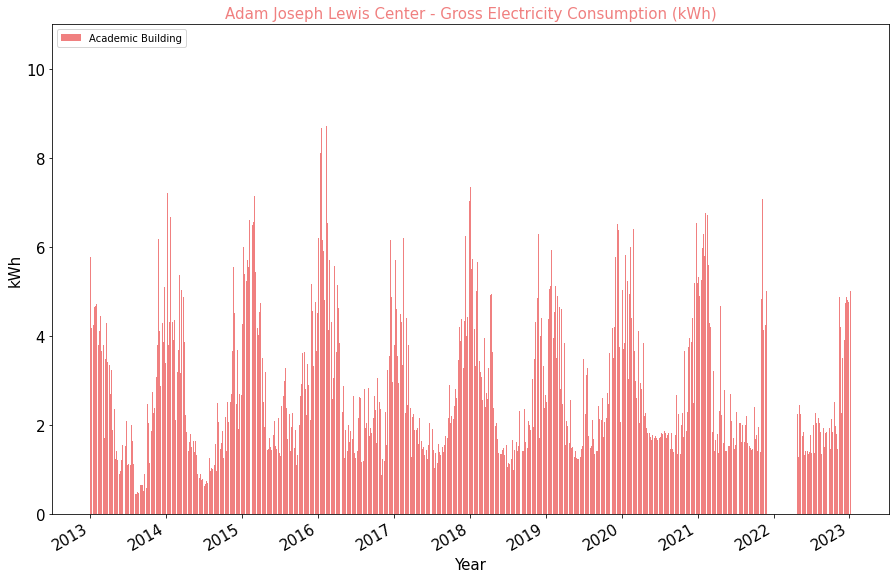

In [397]:
plot_by_dorm(ordered_data[ordered_data.columns[0]], 0)

In [354]:
ordered_data[ordered_data.columns[0]]

Timestamp
2013-01-01    4.192083
2013-01-02    5.782357
2013-01-03    5.467969
2013-01-04    4.394909
2013-01-05    4.390560
                ...   
2023-01-05    3.637969
2023-01-06    5.004740
2023-01-07    5.115781
2023-01-08    4.921263
2023-01-09    5.054430
Name: Adam Joseph Lewis Center - Gross Electricity Consumption (kWh), Length: 3661, dtype: float64

In [ ]:
# def plot(data, ax, fontsize=12):
#     ax.bar(data.index, data) 
# #     ax.locator_params(nbins=3)
#     ax.set_xlabel('Date', fontsize=fontsize)
#     ax.set_ylabel('kWh', fontsize=fontsize)
#     ax.set_title('Title', fontsize=fontsize)
    
# fig = plt.figure(figsize=(20, 10))

# ax1 = plt.subplot(221, sharex='col', sharey='row')
# ax2 = plt.subplot(223, sharex='col', sharey='row')
# ax3 = plt.subplot(122, sharex='col', sharey='row')


# plot(year_data[year_data.columns[1]], ax1)
# plot(year_data[year_data.columns[2]], ax2)
# plot(year_data[year_data.columns[3]],ax3)